### Alucar - Analisando as vendas

In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('sample_data/alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
print('Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [6]:
print('Quantidade de daos nulos:', alucar.isna().sum().sum())

Quantidade de daos nulos: 0


In [7]:
alucar.mes = pd.to_datetime(alucar.mes)

In [8]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [11]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

c:\users\brcap-bi01\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


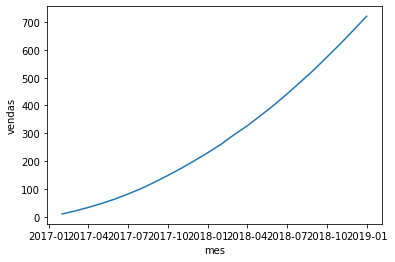

In [12]:
sns.lineplot(x='mes', y='vendas', data=alucar)

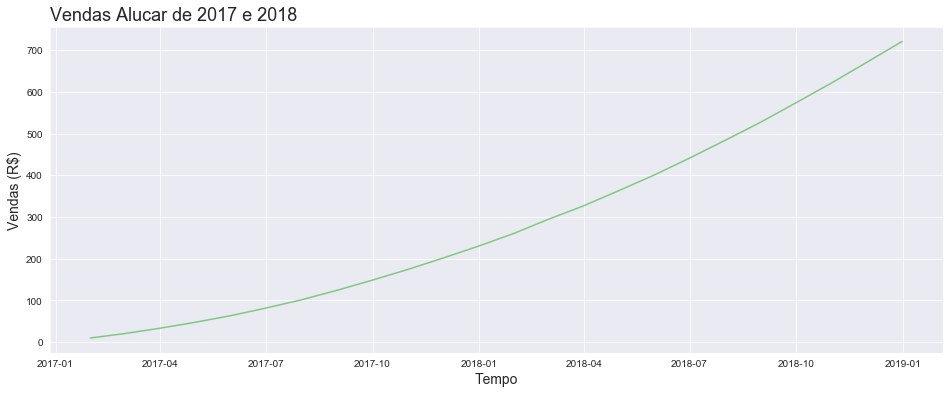

In [20]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(16,6)
ax.set_title('Vendas Alucar de 2017 e 2018',loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [21]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [22]:
alucar['aumento'] = alucar.vendas.diff()

In [23]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


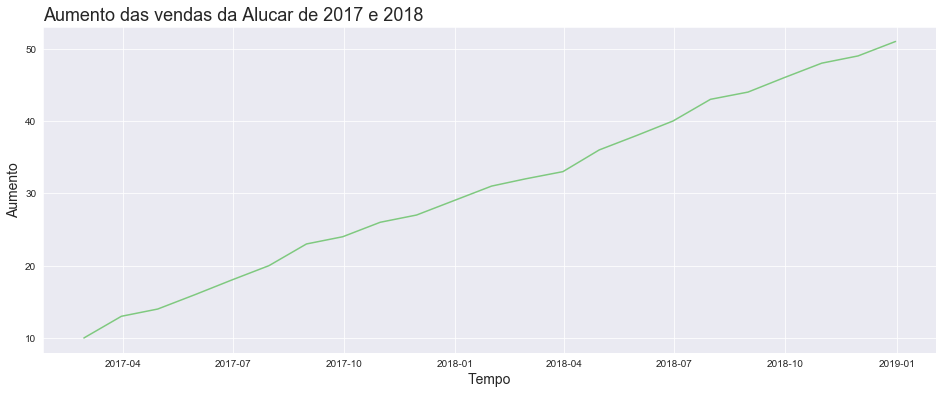

In [26]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(16,6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018',loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [30]:
def plotar(titulo, labelx, labely,x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(16,6)
    ax.set_title(titulo,loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax
    

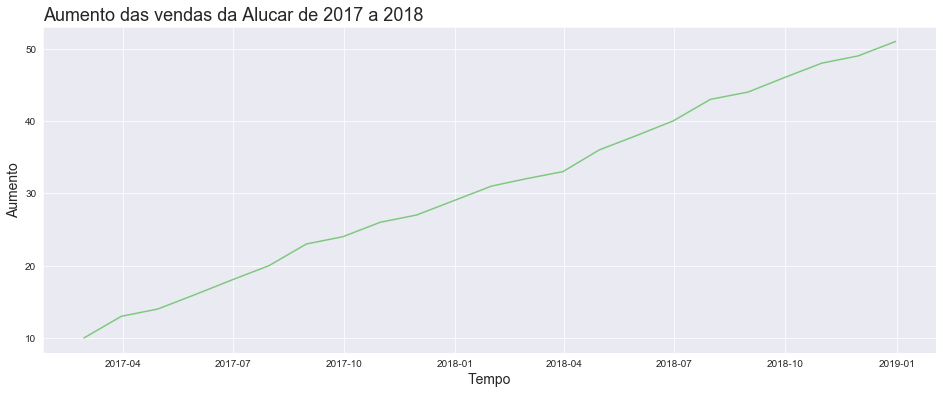

In [31]:
plotar('Aumento das vendas da Alucar de 2017 a 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [32]:
alucar['aceleracao'] = alucar.aumento.diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


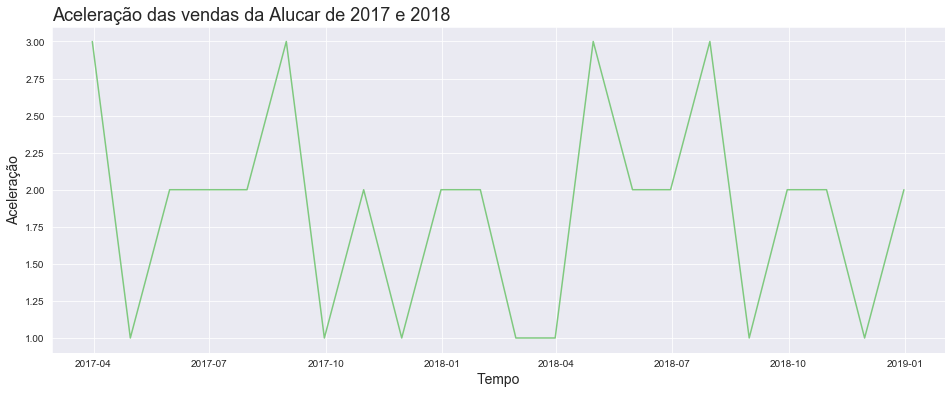

In [33]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar )

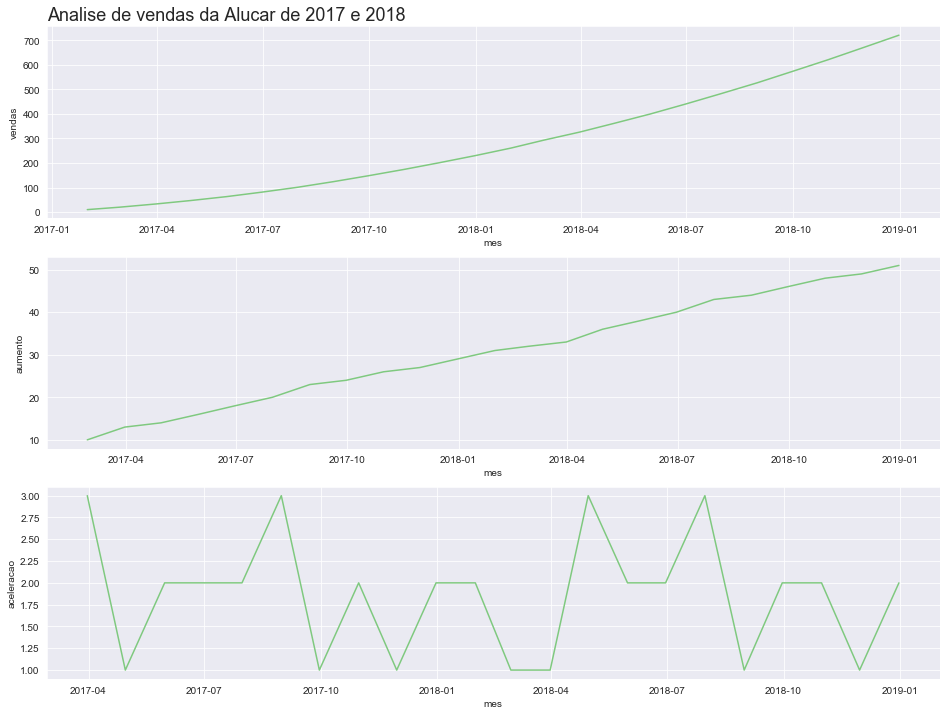

In [37]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise de vendas da Alucar de 2017 e 2018',
             fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [38]:
def plot_comparacao(x,y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

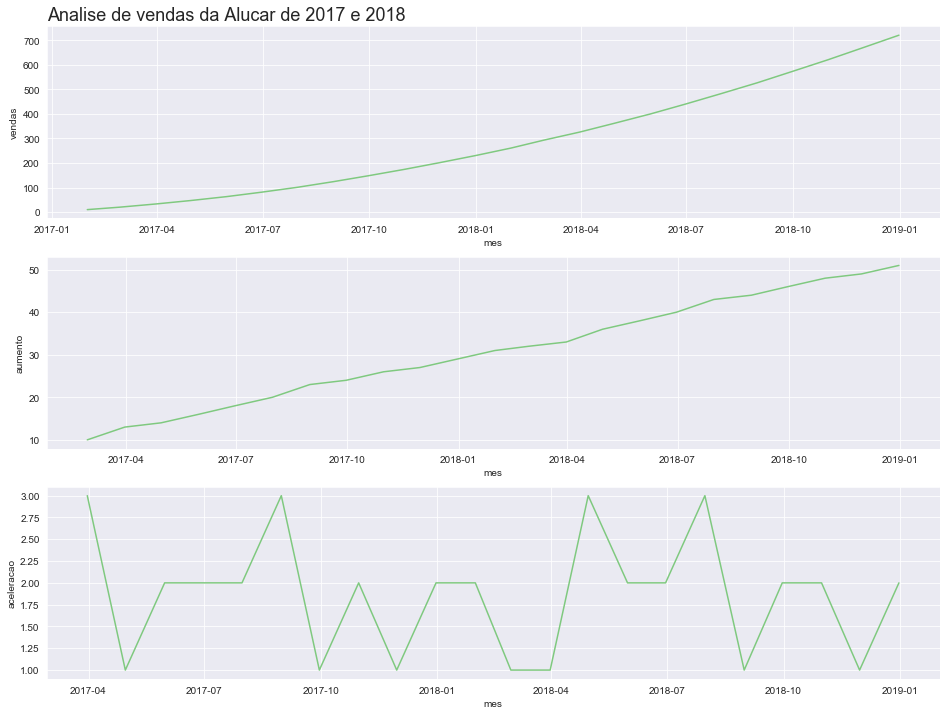

In [39]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar,'Analise de vendas da Alucar de 2017 e 2018')

In [40]:
from pandas.plotting import autocorrelation_plot

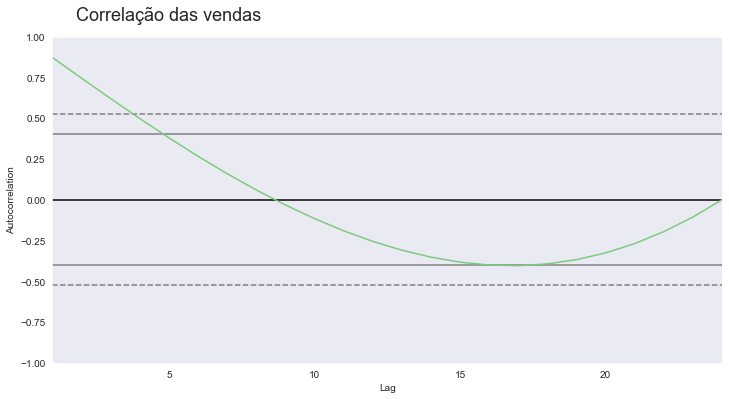

In [47]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.vendas)
ax = ax